# Naive Bayes

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('../Data/diabetes_cleaned_replaced.csv')
df = df.loc[:, df.columns != '0']
df = df.loc[:, df.columns != '1']
df = df.loc[:, df.columns != 'Unnamed: 0']

hospitalLength=np.array(df['8']).flatten()
insulinLevel = np.array(df[['36']]).flatten()

df = df.loc[:, df.columns != '8']
df = df.loc[:, df.columns != '36']


In [3]:
X=np.array(df)

In [4]:
def convertToDiscrete(arr,percentiles):
    t=round(100/percentiles)
    percents=[]
    for i in range(100,0,t*-1):
        percents.append(np.percentile(arr,i))
    discrete=[]
    for a in arr:
        d=0
        for i in range(len(percents)):
            if a<percents[i]:
                d=i
        discrete.append(d)
    return discrete
    

In [5]:
quantilesOfInputs=8
Xd=X+0
for i in range(len(X[0])):
    col=np.array(convertToDiscrete(X[:,i].flatten(),quantilesOfInputs))
    Xd[:,i]=col.T
    

In [6]:

def findAccuracies(mod,target,n=3):
    model = mod()
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax1.set_xlabel("# Quantiles of prediction")
    ax1.set_ylabel("Accuracy")

    percent=[]

    for s in range(2,12):
        scores=[]
        targ=np.array(convertToDiscrete(target,s))
        for i in range(n):
            model = mod()
            x_train, x_test, y_train, y_test = train_test_split(Xd, targ, test_size = 0.2)
            model.fit(x_train, y_train)
            scores.append(model.score(x_test, y_test))
        score=sum(scores)/n
        percent.append(score)
    plt.bar(range(2,12),percent)
    print("Accuracy using quartiles: "+str(percent[2]))


# GaussianNB for Hospital Visit Length

Accuracy using quartiles: 0.44739772690052737


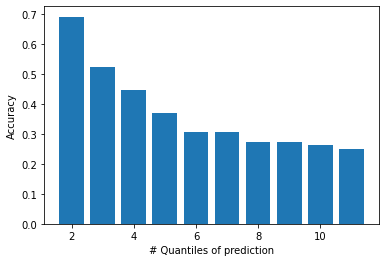

In [7]:
findAccuracies(GaussianNB,hospitalLength)

# MultinomialNB for Hospital Visit Length

Accuracy using quartiles: 0.4301857128819888


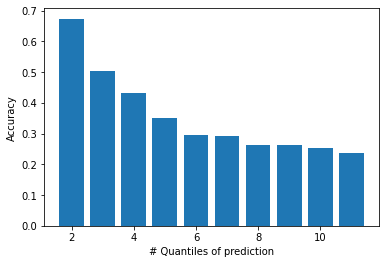

In [8]:
findAccuracies(MultinomialNB,hospitalLength)

# GaussianNB for Insulin Level

Accuracy using quartiles: 0.764992957977138


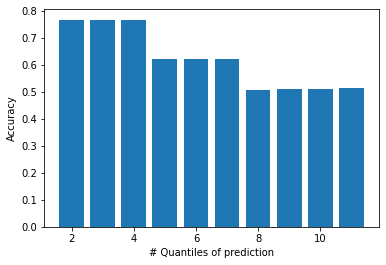

In [9]:
findAccuracies(GaussianNB,insulinLevel)

# MultinomialNB for Insulin Level

Accuracy using quartiles: 0.7712816481608856


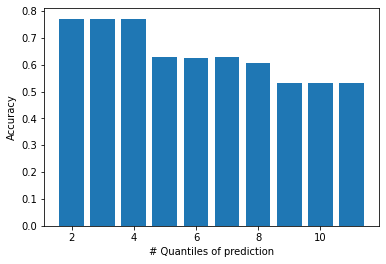

In [10]:
findAccuracies(MultinomialNB,insulinLevel)